In [169]:
import pandas as pd
import numpy
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn import preprocessing

import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns

In [170]:
#data = pd.read_csv('ml_data_cluster.csv')
#read data
def readData(filepath):
    #q_table6 = pd.read_csv(filepath ,encoding = "utf-8",index_col=0)
    #print(q_table6)
    file = open(filepath)
    count = 1
    title = []
    allDta = []
    for data in file.readlines():
        if count == 1:
            title = data.strip()
            count = 0
        else :
            newRow = []
            Row = data.strip().split(',')
            #print(Row)
            for i in range(0, len(Row)):
                #if i == 0 or i ==1 or i ==  2 or i == 7 or i == 8:
                #if i == 0 or i == 7 or i == 8:
                #    continue
                #else :
                if i != 0:
                    newRow.append(Row[i])
            allDta.append(newRow)
    return title, allDta

def readData_df(filePath):
    data_df = pd.read_csv(filePath ,encoding = "utf-8",index_col=0)
    return data_df



data_noe = normalize(dataFrame, norm = 'l2')
print('dataFrame', dataFrame)
data_Norm_DF = pd.DataFrame(data_norm)
data_Norm_DF.to_csv('ml_data_cluster_normalization.csv')

In [195]:
#数据降维，将第一次和第二次成绩进行加权 后 缩小在0-1之间
# 将上网习惯进行加权后放缩在0-1之间
# total 10 dimension data ：0-1 grade, 2-5 ,8,9 behavior ,6 gender,7 major ,10 cluster result
def processingData(data):
    #post_process_data = MinMaxScaler.fit_transform(data)
    transform_data = []
    for row in data:
        new_data = []
        new_data.append(row[0] + row[1])
        new_data.append(row[2] + row[3] + row[4] + row[5] + row[8] + row[9])
        new_data.append(row[6])
        new_data.append(row[7])
        #new_data.append(row[10]) # result 
        transform_data.append(new_data)
    process_df = pd.DataFrame(transform_data)
    process_df.rename(columns={0:'grade', 1:'behavior', 2:'gender', 3:'major', 4:'result'}, inplace = True)
    #print(process_df)
    return process_df

# data list 
def drawPieGraph(name, data, labels):
    # # 饼状图
    # plot.figure(figsize=(8,8))
    #labels = [u'Canteen', u'Supermarket', u'Dorm', u'Others']
    #sizes = [73, 21, 4, 2]
    #colors = ['red', 'yellow', 'blue', 'green']
    explode = (0, 0, 0, 0)
    patches, l_text, p_text = plot.pie(data, #explode=explode#,
                                       labels=labels, #colors=colors,#
                                       labeldistance=1.1, autopct='%2.0f%%', shadow=False,
                                       startangle=90, pctdistance=0.7 )
    # labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
    # autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
    # shadow，饼是否有阴影
    # startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
    # pctdistance，百分比的text离圆心的距离
    # patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

    # 改变文本的大小
    # 方法是把每一个text遍历。调用set_size方法设置它的属性
    for t in l_text:
        t.set_size = 30
    for t in p_text:
        t.set_size = 20
    # 设置x，y轴刻度一致，这样饼图才能是圆的
    plot.axis('equal')
    plot.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
    # loc: 表示legend的位置，包括'upper right','upper left','lower right','lower left'等
    # bbox_to_anchor: 表示legend距离图形之间的距离，当出现图形与legend重叠时，可使用bbox_to_anchor进行调整legend的位置
    # 由两个参数决定，第一个参数为legend距离左边的距离，第二个参数为距离下面的距离
    plot.title(name)
    plot.grid()
    plot.show()
    #plot.savefig('1.png')

#  绘制条形图   
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))
        
def drawBarGraph(data):
    #l1=[68, 96, 85, 86, 76,87, 95]
    #l2=[85, 68, 79, 89, 94, 82,90]
    name=['gra_aver','act','male','m_sci','m_liter','m_sport']
    total_width, n = 2, 5
    width = total_width / n
    x = [0,3,6,9,12,15]
    #x=[0, 0.2, 1 ,1.5, 2] 
    for i in range(len(data)):
        if i == 2 : 
            a = plt.bar(x, data[i], width=width, label=str(i), tick_label = name)
        else:a = plt.bar(x, data[i], width=width, label=str(i))    
        for i in range(6):
            x[i] = x[i] + width
        #autolabel(a)
    #b=plt.bar(x, data[1], width=width, label='1')
    #for i in range(len(x)):
    #x[i] = x[i] + width
    
    #autolabel(a)
    #autolabel(b)
    plt.xlabel('feature')
    plt.ylabel('value')
    plt.title('cluster analysis')
    plt.legend()
    plt.show()

In [196]:
def cluster(k,data):
    
    data_Norm = normalize(data, norm = 'l2') # 正则化
    #print('data_Norm', data_Norm) 
    data_Norm_DF = pd.DataFrame(data_Norm)
    data_Norm_DF.to_csv('kmeans_ml_data_cluster.csv', sep='，')
    clf = KMeans(n_clusters = k, max_iter = 1000)
    y_pred = clf.fit_predict(data_Norm)
    y_df = pd.DataFrame(y_pred)
    #print(y_df)
    return y_df

def cluster_k5():
    k = 5 # 聚类类别
    data_df = readData_df('ml_data_cluster.csv') # read file csv
    y_pred = cluster(k, data_df)
    min_max_scaler = preprocessing.MinMaxScaler()
    normal = min_max_scaler.fit_transform(data_df)
    process_data = processingData(normal)
    process_data['result'] = y_pred
    #print(process_data.columns.tolist())
    
    group_0 = process_data.groupby(['result']).get_group(0)
    
    grade_mean_0 = group_0['grade'].mean()
    #grade_per_0 = len(group_0[group_0['grade'] >= grade_mean_0])/len(len(group_0))   
    behavior_mean_0 = group_0['behavior'].mean()
    #behavior_per_0 = len(group_0[group_0['behavior'] >= behavior_maen_0])/len(len(group_0)) 
    male_per_0 = len(group_0[group_0['gender'] == 1])/len(group_0)   
    sci_per_0 = len(group_0[group_0['major'] == 1])/len(group_0)
    sport_per_0 = len(group_0[group_0['major'] == 0.5])/len(group_0)
    literature_per_0 = len(group_0[group_0['major'] == 0])/len(group_0)
    
    group_1 = process_data.groupby(['result']).get_group(1)
    
    grade_mean_1 = group_1['grade'].mean()
    #grade_per_1 = len(group_1[group_0['grade'] >= grade_mean_1])/len(len(group_1)) 
    behavior_mean_1 = group_1['behavior'].mean()
    male_per_1 = len(group_1[group_1['gender'] == 1])/len(group_1)
    sci_per_1 = len(group_1[group_1['major'] == 1])/len(group_1)
    sport_per_1 = len(group_1[group_1['major'] == 0.5])/len(group_1)
    literature_per_1 = len(group_1[group_1['major'] == 0])/len(group_1)
    
    group_2 = process_data.groupby(['result']).get_group(2)
    
    grade_mean_2 = group_2['grade'].mean()
    behavior_mean_2 = group_2['behavior'].mean()
    male_per_2 = len(group_2[group_2['gender'] == 1])/len(group_2)   
    sci_per_2 = len(group_2[group_2['major'] == 1])/len(group_2)
    sport_per_2 = len(group_2[group_2['major'] == 0.5])/len(group_2)
    literature_per_2 = len(group_2[group_2['major'] == 0])/len(group_2)
    
    group_3 = process_data.groupby(['result']).get_group(3)
    
    grade_mean_3 = group_3['grade'].mean()
    behavior_mean_3 = group_3['behavior'].mean()
    male_per_3 = len(group_3[group_3['gender'] == 1])/len(group_3)   
    sci_per_3 = len(group_3[group_3['major'] == 1])/len(group_3)
    sport_per_3 = len(group_3[group_3['major'] == 0.5])/len(group_3)
    literature_per_3 = len(group_3[group_3['major'] == 0])/len(group_3)
    
    group_4 = process_data.groupby(['result']).get_group(4)
    
    grade_mean_4 = group_4['grade'].mean()
    behavior_mean_4 = group_4['behavior'].mean()
    male_per_4 = len(group_4[group_4['gender'] == 1])/len(group_4)   
    sci_per_4 = len(group_4[group_4['major'] == 1])/len(group_4)
    sport_per_4 = len(group_4[group_4['major'] == 0.5])/len(group_4)
    literature_per_4 = len(group_4[group_4['major'] == 0])/len(group_4)
    
    grade_mean = [grade_mean_0, grade_mean_1, grade_mean_2, grade_mean_3, grade_mean_4]
    behavior_mean = [behavior_mean_0, behavior_mean_1, behavior_mean_2, behavior_mean_3, behavior_mean_4] 
    male_per = [male_per_0, male_per_1, male_per_2, male_per_3, male_per_4]
    sci_per = [sci_per_0, sci_per_1, sci_per_2, sci_per_3, sci_per_4]
    sport_per = [sport_per_0, sport_per_1, sport_per_2, sport_per_3, sport_per_4]
    literature_per = [literature_per_0, literature_per_1, literature_per_2, literature_per_3, literature_per_4]
    
    data = []
    for i in range(5):
        arr = []
        arr.append(grade_mean[i])
        arr.append(behavior_mean[i])
        arr.append(male_per[i])
        arr.append(sci_per[i])
        arr.append(sport_per[i])
        arr.append(literature_per[i])
        data.append(arr)
        
    #print(grade_mean, behavior_mean, male_per, sci_per, sport_per, literature_per)
    #print('\n', data)
    
    percent = [len(group_0), len(group_1),len(group_2), len(group_3),len(group_4)]
    #percent_df = pd.DataFrame(percent)
    #print(percent)
    name = 'cluster k = 5 percent pie graph'
    labels = []
    for i in range(0, k):
        labels.append(str(i))
    drawPieGraph(name, percent, labels)
    #test()
    drawBarGraph(data)
    
def cluster_k2():
    k = 2 # 聚类类别
    data_df = readData_df('ml_data_cluster.csv') # read file csv
    y_pred = cluster(k, data_df)
    min_max_scaler = preprocessing.MinMaxScaler()
    normal = min_max_scaler.fit_transform(data_df)
    process_data = processingData(normal)
    process_data['result'] = y_pred
    #print(process_data.columns.tolist())
    group_0 = process_data.groupby(['result']).get_group(0)
    group_1 = process_data.groupby(['result']).get_group(1)
    percent = [len(group_0), len(group_1)]
    #percent_df = pd.DataFrame(percent)
    #print(percent)
    name = 'cluster k = 2 percent pie graph'
    labels = []
    for i in range(0, k):
        labels.append(str(i))
    drawPieGraph(name, percent, labels)

def cluster_k3():
    k = 3 # 聚类类别
    data_df = readData_df('ml_data_cluster.csv') # read file csv
    y_pred = cluster(k, data_df)
    min_max_scaler = preprocessing.MinMaxScaler()
    normal = min_max_scaler.fit_transform(data_df)
    process_data = processingData(normal)
    process_data['result'] = y_pred
    #print(process_data.columns.tolist())
    group_0 = process_data.groupby(['result']).get_group(0)
    group_1 = process_data.groupby(['result']).get_group(1)
    group_2 = process_data.groupby(['result']).get_group(2)
    percent = [len(group_0), len(group_1), len(group_2)]
    #percent_df = pd.DataFrame(percent)
    #print(percent)
    name = 'cluster k = 3 percent pie graph'
    labels = []
    for i in range(0, k):
        labels.append(str(i))
    drawPieGraph(name, percent, labels)

[0.8133171034100538, 0.3744807532642438, 0.45682888742009503, 0.3521131375521463, 0.304627637802583] [0.31910762172329876, 0.1692257225817602, 0.10349644473525646, 0.04592126527110517, 0.005220767219655208] [0.302190988011575, 0.2608695652173913, 0.3076923076923077, 0.2459016393442623, 0.1] [0.43654402645721374, 0.5217391304347826, 0.38461538461538464, 0.36065573770491804, 0.6] [0.25258371227780074, 0.08695652173913043, 0.15384615384615385, 0.08196721311475409, 0.2] [0.3108722612649855, 0.391304347826087, 0.46153846153846156, 0.5573770491803278, 0.2]

 [[0.8133171034100538, 0.31910762172329876, 0.302190988011575, 0.43654402645721374, 0.25258371227780074, 0.3108722612649855], [0.3744807532642438, 0.1692257225817602, 0.2608695652173913, 0.5217391304347826, 0.08695652173913043, 0.391304347826087], [0.45682888742009503, 0.10349644473525646, 0.3076923076923077, 0.38461538461538464, 0.15384615384615385, 0.46153846153846156], [0.3521131375521463, 0.04592126527110517, 0.2459016393442623, 0.360

C:\Users\chenyi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


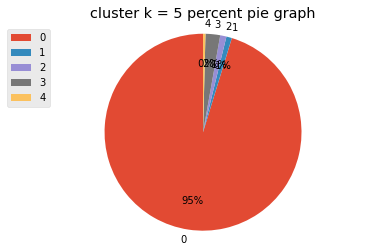

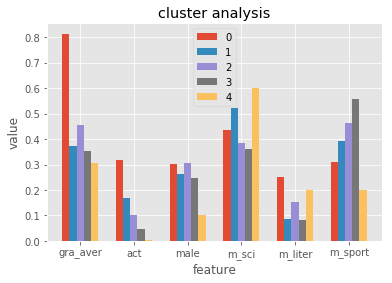

C:\Users\chenyi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


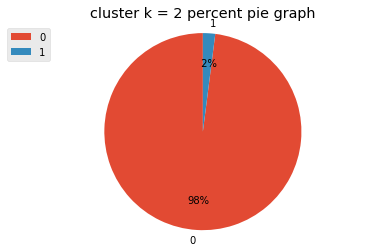

C:\Users\chenyi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


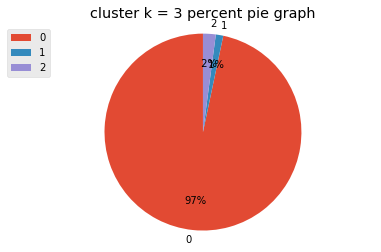

In [198]:
if __name__ == '__main__':
    cluster_k5()
    cluster_k2()
    cluster_k3()